In [ ]:
!gdown 1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC

Downloading...
From: https://drive.google.com/uc?id=1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC
To: /content/data_g1.csv
100% 9.79M/9.79M [00:00<00:00, 90.8MB/s]


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('data_g1.csv')

In [ ]:
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
1,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
2,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
3,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
4,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [ ]:
data.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,...,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000
mean,79694.392298,45.219727,163.775482,65.460080,82.100653,0.990653,0.984779,1.025911,1.025367,122.200396,...,57.282677,115.370058,14.553406,1.077364,0.874245,25.297559,25.464194,32.554025,0.182052,0.250830
std,45974.947397,12.019891,9.060404,12.547429,9.062907,0.407614,0.400383,0.158870,0.157239,13.018763,...,14.272188,28.504080,1.471435,0.354414,0.185319,9.364472,17.450445,28.076767,0.385889,0.433493
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39788.500000,40.000000,155.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,113.000000,...,46.000000,95.000000,13.500000,1.000000,0.700000,20.000000,16.000000,17.000000,0.000000,0.000000
50%,79731.000000,45.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,55.000000,115.000000,14.700000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,119550.500000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,134.000000,15.700000,1.000000,1.000000,29.000000,31.000000,39.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,2914.000000,926.000000,1.000000,1.000000


In [ ]:
data = data.drop(columns=['id'])

In [ ]:
data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

<Axes: >

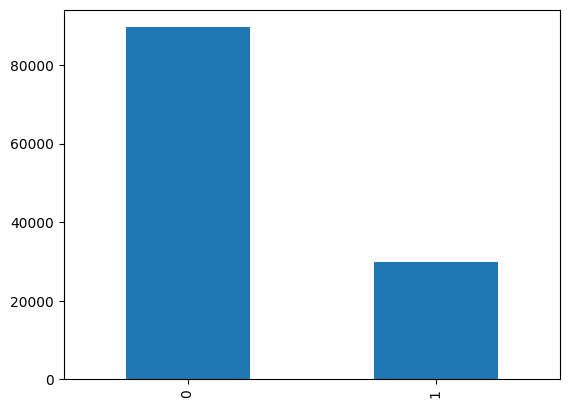

In [ ]:
data['smoking'].value_counts().plot.bar()

In [ ]:
X, Y  =  data.drop(columns=['smoking']), data['smoking']

In [ ]:
cv = KFold(5)

In [ ]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 7],
    "min_samples_split": range(20, 50, 5)
}

In [ ]:
max_score = -1
max_crit = -1
max_m_depth = -1
max_samples = -1
for criterion in params['criterion']:
  for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
      clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
      predictions = cross_val_predict(clf, X, Y, cv=cv)
      f = f1_score(Y, predictions)
      if f > max_score:
        max_score = f
        max_crit = criterion
        max_m_depth = max_depth
        max_samples = min_samples_split

In [ ]:
max_crit, max_m_depth, max_samples

('entropy', 3, 20)

In [ ]:
clf = DecisionTreeClassifier(criterion=max_crit, max_depth=max_m_depth, min_samples_split=max_samples)

In [ ]:
predictions = cross_val_predict(clf, X, Y, cv=cv)

In [ ]:
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79     89603
           1       0.19      0.11      0.14     30000

    accuracy                           0.66    119603
   macro avg       0.47      0.48      0.46    119603
weighted avg       0.60      0.66      0.63    119603

